<a href="https://colab.research.google.com/github/kevin-loaiza/senales_y_sistemas/blob/main/SLIT/Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolución

- La convolución es una operación importante en la teoría de señales y sistemas.

- También, aparece en una amplia gama de otros problemas físicos y matemáticos, especialmente en el modelado de sistemas lineales e invariantes con el tiempo (SLIT).

- La operación es, por lo tanto, de interés general y bien conocida en matemáticas.

- La convolución de dos señales $s(t)$ y $g(t)$ se define como:

\begin{equation}
s(t) * g(t) = \int_{-\infty}^{\infty} s(\tau) \cdot g(t - \tau) \; d\tau =
\int_{-\infty}^{\infty} s(t - \tau) \cdot g(\tau) \; d\tau
\end{equation}
donde $*$ es una notación corta para indicar convolución.

### Propiedades

Para las señales $s(t)$, $g(t)$, $h(t) \in \mathbb{R},\mathbb{C}$ la convolución cumple las siguientes propiedades:

- El impulso de Dirac es un [elemento identidad](https://en.wikipedia.org/wiki/Identity_element) de la convolución
    \begin{equation}
    s(t) * \delta(t) = s(t)
    \end{equation}

- La convolución es [conmutativa](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    s(t) * g(t) = g(t) * s(t)
    \end{equation}

- La convolución es [asociativa](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left[ s(t) * g(t) \right] * h(t) = s(t) * \left[ g(t) * h(t) \right]
    \end{equation}

- La convolución es [distributiva](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    s(t) * \left[ g(t) + h(t) \right] = s(t) * g(t) + s(t) * h(t)
    \end{equation}

- Multiplicación por un escalar $a \in \mathbb{R},\mathbb{C}$
    \begin{equation}
    a \cdot \left[ s(t) * g(t) \right] = \left[ a \cdot s(t) \right] * g(t) = s(t) * \left[ a \cdot g(t) \right]
    \end{equation}

- Derivada de la convolución
    \begin{equation}
    \frac{d}{dt} \left[ s(t) * g(t) \right] =  \frac{d s(t)}{dt} * g(t) = s(t) * \frac{d g(t)}{dt}
    \end{equation}

La primera propiedad es una consecuencia de la propiedad de selectividad del impulso de Dirac, desde la segunda hasta la quinta propiedad, se puede demostrar considerando la definición de la integral de convolución y la sexta propiedad se deriva de las propiedades de la derivada de la función delta de Dirac.

### Interpretación Gráfica

La convolución es generalmente [interpretada de manera gráfica](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). Esta interpretación proporciona información valiosa sobre su cálculo y permite obtener una primera estimación del resultado.

El cálculo de la integral de convolución:

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}

se puede descomponer en las siguientes operaciones:

- Sustituir $t$ por $\tau$ en $x(t)$ y $h(t)$.

- Reflejar $h(\tau)$ sobre el eje vertical.

- Desplazar $h(-\tau)$ en $t$, para obtener $h(t - \tau)$,

- Desplazar $h(t - \tau)$ por $t = -\infty \dots \infty$, verificar si hay traslape con $x(\tau)$ y calcular la integral de convolución sobre las secciones traslapadas.

La interpretación gráfica de estas operaciones se ilustra con el siguiente ejemplo.

**Ejemplo**

La convolución $y(t) = x(t) * h(t)$ se realizará a partir de las siguientes señales

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


In [2]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)#variables simbólicas

In [3]:
class rect(sym.Function): #función pulso rectangular
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [4]:
def plot_signals(x_axis, x, h, ylabel, xlabel):#función para graficar convolución
    p1 = sym.plot(x, (x_axis, -5, 5), show=False, line_color='b', ylabel=ylabel, xlabel=xlabel)
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='r')
    p1.extend(p2)
    p1.show()

Ahora vamos a definir y trazar las señales. A continuación, la señal $h(t)$ se ilustra mediante el gráfico rojo y la señal $x(t)$ mediante el gráfico azul.

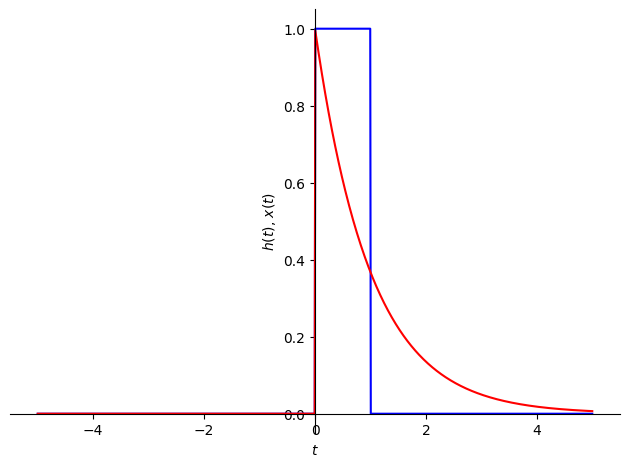

In [5]:
h = sym.exp(-t) * sym.Heaviside(t)
x = rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

 El **primer paso** es sustituir $t$ por $\tau$ para obtener $h(\tau)$ y $x(\tau)$. Observe que el eje independiente ahora representa a $\tau$.

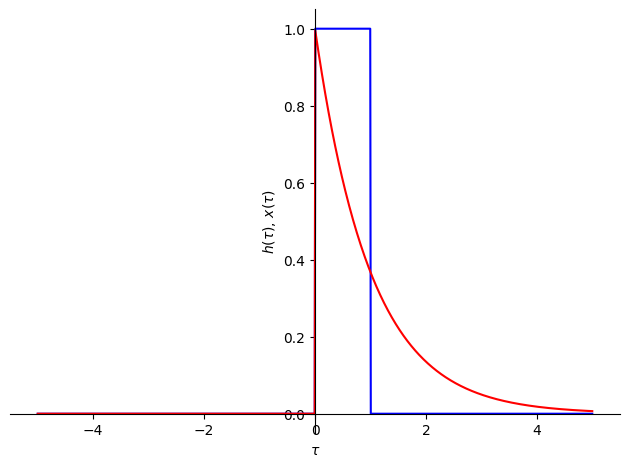

In [6]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

El **segundo paso** es reflejar $h(\tau)$ para obtener $h(-\tau)$

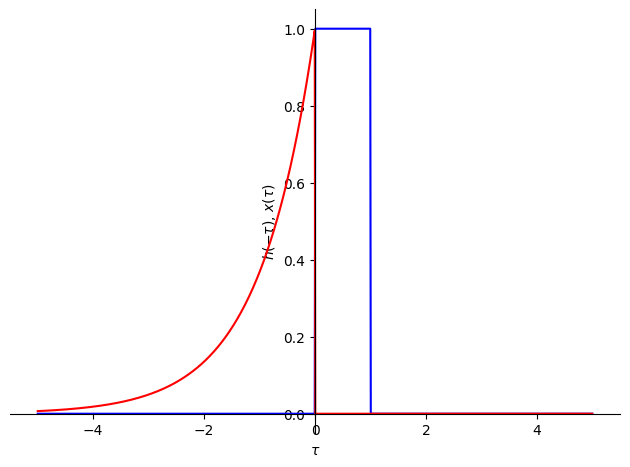

In [7]:
h2 = h1.subs(tau, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

La respuesta al impulso $h(-\tau)$ se desplaza por $t$ a la derecha en el **tercer paso** para obtener $h(t - \tau)$. Esto se ilustra para $t = -2$

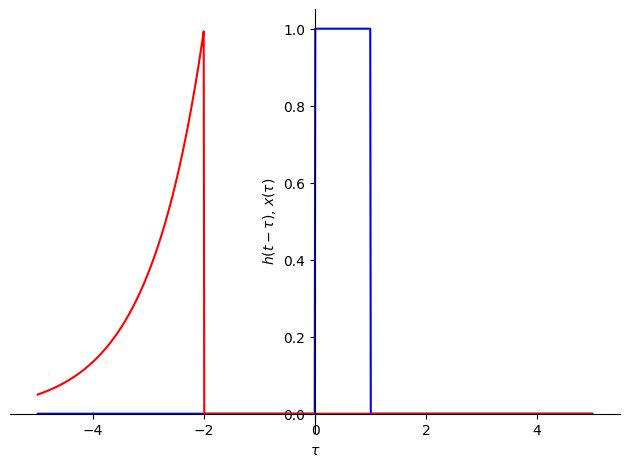

In [8]:
h3 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Ahora resulta obvio que tenemos que considerar tres casos con respecto a la superposición de $h(t-\tau)$ y $x(\tau)$

1. $t<0$: sin traslape
2. $0 \leq t < 1$: traslape parcial
3. $t > 0$: traslape completo



**Ejercicio**

En el **cuarto paso**, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que $y(t)=0$ para $t<0$.

$t<0$$t<0$: No hay solapamiento entre $x(\tau)$$x(\tau)$ y $h(t-\tau)$$h(t-\tau)$.
$0 \leq t < 1$$0 \leq t < 1$: Hay solapamiento parcial entre $x(\tau)$$x(\tau)$ y $h(t-\tau)$$h(t-\tau)$.
$t > 1$$t > 1$: Hay solapamiento completo entre $x(\tau)$$x(\tau)$ y $h(t-\tau)$$h(t-\tau)$. (Nota: El texto original dice $t>0$$t>0$, pero observando los gráficos, parece que el solapamiento completo ocurre para $t>1$$t>1$).
La integral de convolución está definida como:

$y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau$$y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau$

Para resolver el ejercicio, debes evaluar esta integral para cada uno de los tres rangos de $t$$t$, considerando las definiciones de $x(t)$$x(t)$ y $h(t)$$h(t)$:

$h(t) = e^{-t} u(t)$$h(t) = e^{-t} u(t)$ (donde $u(t)$$u(t)$ es la función escalón unitario, implícita en $e^{-t}$$e^{-t}$ para $t>0$$t>0$) $x(t) = \text{rect} \left(t - \frac{1}{2}\right)$$x(t) = \text{rect} \left(t - \frac{1}{2}\right)$ (que es 1 para $0 \leq t < 1$$0 \leq t < 1$ y 0 en otro caso)

Para el primer caso ($t<0$$t<0$), como no hay solapamiento, el producto $x(\tau) \cdot h(t-\tau)$$x(\tau) \cdot h(t-\tau)$ es cero para todos los valores de $\tau$$\tau$. Por lo tanto, la integral es cero, y $y(t) = 0$$y(t) = 0$ para $t<0$$t<0$.

Para los otros dos casos, deberás determinar los límites de integración en función de $t$$t$ y evaluar la integral del producto de las funciones.

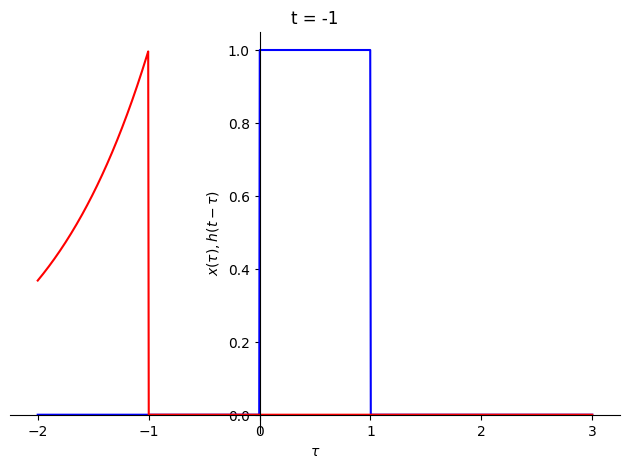

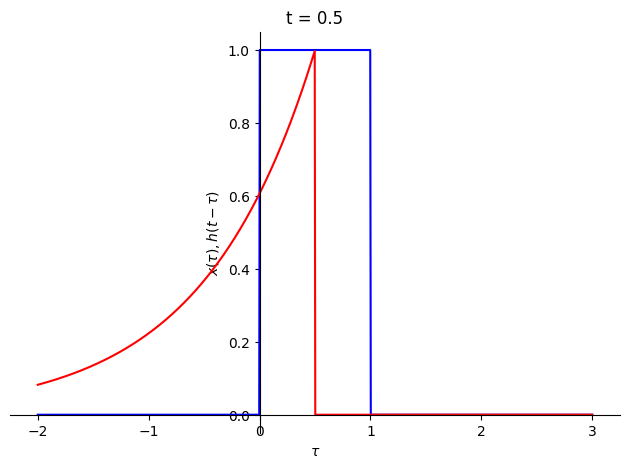

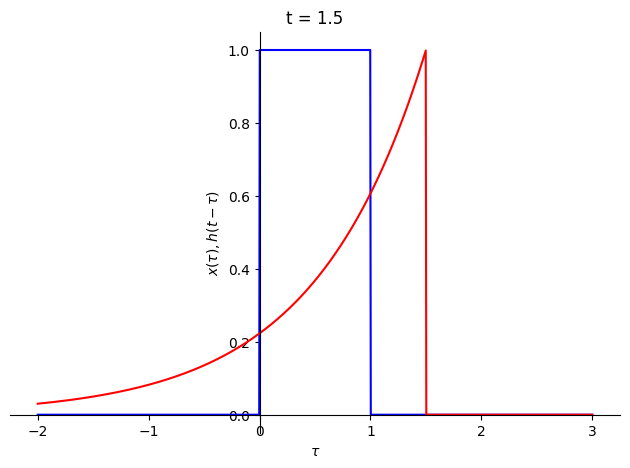

In [9]:
# Función para graficar las señales x(tau) y h(t-tau) para un valor específico de t
def plot_convolution_step(tau_axis, x_tau, h_t_minus_tau, t_value):
    h_shifted = h_t_minus_tau.subs(t, t_value)
    p1 = sym.plot(x_tau, (tau_axis, -2, 3), show=False, line_color='b', ylabel=r'$x(\tau), h(t-\tau)$', xlabel=r'$\tau$')
    p2 = sym.plot(h_shifted, (tau_axis, -2, 3), show=False, line_color='r')
    p1.extend(p2)
    p1.title = f't = {t_value}'
    p1.show()

# Define las señales en tau
x_tau = rect(tau - 1/2)
h_tau = sym.exp(-tau) * sym.Heaviside(tau)

# Define h(t-tau)
h_t_minus_tau = h_tau.subs(tau, t-tau)

# Caso 1: t < 0 (por ejemplo, t = -1)
plot_convolution_step(tau, x_tau, h_t_minus_tau, -1)

# Caso 2: 0 <= t < 1 (por ejemplo, t = 0.5)
plot_convolution_step(tau, x_tau, h_t_minus_tau, 0.5)

# Caso 3: t > 1 (por ejemplo, t = 1.5)
plot_convolution_step(tau, x_tau, h_t_minus_tau, 1.5)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.